In [1]:
import sys
from collections import OrderedDict
from collections import defaultdict

import scipy.stats
import pandas as pd
import numpy as np
import pylogit as pl

sys.path.insert(0, '../src')
from visualization import predictive_viz as viz

%matplotlib inline

/Users/timothyb0912/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Load the car data

In [2]:
car_df = pd.read_csv("../data/processed/model_ready_car_data.csv")

# Create the model specification

In [5]:
# Create interaction variables for the various body types
body_names = ['sports_utility_vehicle',
              'sports_car',
              'station_wagon',
              'truck',
              'van']

non_body_or_fuel_vars = ['price_over_log_income',
                         'ln(price_over_log_income)',
                         'range_over_100',
                         'acceleration_over_10',
                         'top_speed_over_100',
                         'pollution',
                         'vehicle_size_over_10',
                         'tens_of_cents_per_mile']

body_interactions = defaultdict(lambda : [])

for body in body_names:
    for interaction_var in non_body_or_fuel_vars:
        new_name = interaction_var + "_for_" + body
        # Store the new variable name
        body_interactions[interaction_var].append(new_name)

# Create interaction variables for the various fuel types
fuel_names = ['electric',
              'compressed_natural_gas',
              'methanol']

fuel_interaction_vars = ['price_over_log_income',
                         'ln(price_over_log_income)',
                         'range_over_100',
                         'top_speed_over_100',
                         'pollution',
                         'vehicle_size_over_10',
                         'tens_of_cents_per_mile']

fuel_interactions = defaultdict(lambda : [])

for fuel in fuel_names:
    for interaction_var in fuel_interaction_vars:
        new_name = interaction_var + "_for_" + fuel
        # Store the new variable name
        fuel_interactions[interaction_var].append(new_name)


In [6]:
interaction_mnl_spec, interaction_mnl_names =\
    OrderedDict(), OrderedDict()

orig_cols_and_display_names =\
    [('price_over_log_income', 'Price over log(income)'),
     ('range_over_100', 'Range (units: 100mi)'),
     ('acceleration_over_10', 'Acceleration (units: 0.1sec)'),
     ('top_speed_over_100', 'Top speed (units: 0.01mph)'),
     ('pollution', 'Pollution'),
     ('vehicle_size_over_10', 'Size'),
     ('big_enough', 'Big enough'),
     ('luggage_space', 'Luggage space'),
     ('tens_of_cents_per_mile', 'Operation cost'),
     ('station_availability', 'Station availability'),
     ('sports_utility_vehicle', 'Sports utility vehicle'),
     ('sports_car', 'Sports car'),
     ('station_wagon', 'Station wagon'),
     ('truck', 'Truck'),
     ('van', 'Van'),
     ('electric', 'EV'),
     ('electric_commute_lte_5mi', 'Commute < 5 & EV'),
     ('electric_and_college', 'College & EV'),
     ('compressed_natural_gas', 'CNG'),
     ('methanol', 'Methanol'),
     ('methanol_and_college', 'College & Methanol')]
    
for col, display_name in orig_cols_and_display_names:
    if col in body_interactions:
        for interaction_col in body_interactions[col]:
            suffix =\
                interaction_col[interaction_col.rfind("for_") + 4:]
            new_display_name =\
                display_name + " ({})".format(suffix)
            
            interaction_mnl_spec[interaction_col] = 'all_same'
            interaction_mnl_names[interaction_col] =\
                new_display_name

    interaction_mnl_spec[col] = 'all_same'
    interaction_mnl_names[col] = display_name


# Estimate the model with interactions.

In [7]:
# Initialize the mnl model
interaction_mnl = pl.create_choice_model(data=car_df,
                                         alt_id_col='alt_id',
                                         obs_id_col='obs_id',
                                         choice_col='choice',
                                         specification=interaction_mnl_spec,
                                         model_type='MNL',
                                         names=interaction_mnl_names)

# Create the initial variables for model estimation
num_vars = len(interaction_mnl_names)
initial_vals = np.zeros(num_vars)

# Estimate the mnl model
interaction_mnl.fit_mle(initial_vals, method='BFGS')

# Look at the estimation results
interaction_mnl.get_statsmodels_summary()

Log-likelihood at zero: -8,338.8486
Initial Log-likelihood: -8,338.8486


/Users/timothyb0912/anaconda/lib/python2.7/site-packages/scipy/optimize/_minimize.py:385: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  RuntimeWarning)


Estimation Time: 0.46 seconds.
Final log-likelihood: -7,339.5969


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Multinomial Logit Model Regression Results                    
===================================================================================
Dep. Variable:                      choice   No. Observations:                4,654
Model:             Multinomial Logit Model   Df Residuals:                    4,598
Method:                                MLE   Df Model:                           56
Date:                     Sat, 09 Jun 2018   Pseudo R-squ.:                   0.120
Time:                             16:51:55   Pseudo R-bar-squ.:               0.113
converged:                            True   Log-Likelihood:             -7,339.597
                                             LL-Null:                    -8,338.849
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------------------------
Price over log(income) (sports_utility_vehicle)           0.2654      0.063      4.187      0.000         0.141     0.390
Price over log(income) (sports_car)                       0.1658      0.065      2.542      0.011         0.038     0.294
Price over log(income) (station_wagon)                   -0.1035      0.036     -2.902      0.004        -0.173    -0.034
Price over log(income) (truck)                           -0.0577      0.027     -2.154      0.031        -0.110    -0.005
Price over log(income) (van)                             -0.0834      0.027     -3.093      0.002        -0.136    -0.031
Price over log(income)                                   -0.1877      0.029     -6.520      0.000        -0.244    -0.131
Range (units: 100mi) (sports_utility_vehicle)            -0.0936      0.100     -0.937      0.349        -0.290     0.102
Range (units: 100mi) (sports_car)                        -0.0792      0.117     -0.678      0.498        -0.308     0.150
Range (units: 100mi) (station_wagon)                     -0.0893      0.085     -1.046      0.295        -0.257     0.078
Range (units: 100mi) (truck)                              0.0056      0.070      0.080      0.936        -0.131     0.142
Range (units: 100mi) (van)                                0.0651      0.067      0.976      0.329        -0.066     0.196
Range (units: 100mi)                                      0.3545      0.033     10.833      0.000         0.290     0.419
Acceleration (units: 0.1sec) (sports_utility_vehicle)    -0.1803      0.497     -0.363      0.717        -1.154     0.793
Acceleration (units: 0.1sec) (sports_car)                -0.9920      0.599     -1.655      0.098        -2.167     0.183
Acceleration (units: 0.1sec) (station_wagon)             -0.3337      0.445     -0.749      0.454        -1.207     0.539
Acceleration (units: 0.1sec) (truck)                     -0.1304      0.360     -0.362      0.717        -0.837     0.576
Acceleration (units: 0.1sec) (van)                       -0.6260      0.322     -1.946      0.052        -1.257     0.005
Acceleration (units: 0.1sec)                             -0.5455      0.145     -3.760      0.000        -0.830    -0.261
Top speed (units: 0.01mph) (sports_utility_vehicle)      -0.1059      0.329     -0.322      0.747        -0.750     0.538
Top speed (units: 0.01mph) (sports_car)                   0.2758      0.393      0.702      0.483        -0.494     1.046
Top speed (units: 0.01mph) (station_wagon)                0.1534      0.279      0.551      0.582        -0.393     0.699
Top speed (units: 0.01mph) (truck)                        0.1174      0.223      0.527      0.598        -0.319     0.554
Top speed (units: 0.01mph) (van)                         -0.0254      0.215     -0.118      0.906        -0.448     0.397
Top speed (units: 0.01mp

# Check the interaction model

In [23]:
# Simulate values from the sampling distribution of coefficients
interaction_sampling_dist =\
    scipy.stats.multivariate_normal(mean=interaction_mnl.params.values,
                                    cov=interaction_mnl.cov)
# Take Draws from the sampling distribution
num_draws = 500
simulated_coefs = interaction_sampling_dist.rvs(num_draws)
simulated_coefs.shape

(500, 56)

In [24]:
# Predict the model probabilities
simulated_probs =\
    interaction_mnl.predict(car_df,
                    param_list=[simulated_coefs.T, None, None, None])

# Simulate y from the sampling distribution
likelihood_sim_y =\
    viz.simulate_choice_vector(simulated_probs,
                               car_df['obs_id'].values,
                               rseed=1122018)

Simulating Choices: 100%|██████████| 4654/4654 [00:00<00:00, 8878.49it/s]


## Look at the price variable

Calculating CDFs: 100%|██████████| 100/100 [00:00<00:00, 291.69it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
Calculating KDEs: 100%|██████████| 100/100 [00:00<00:00, 194.58it/s]


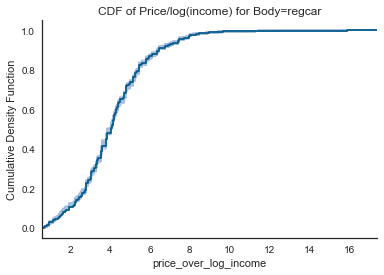

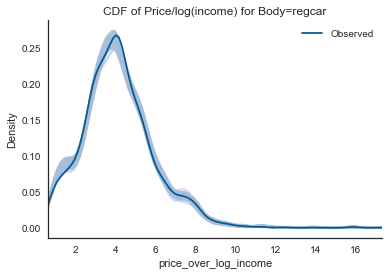

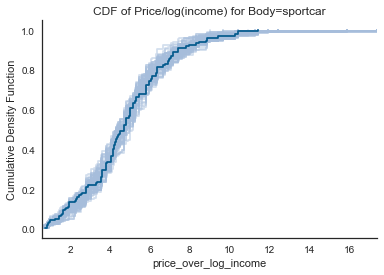

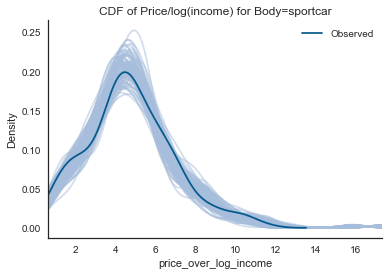

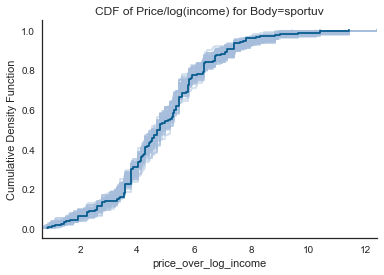

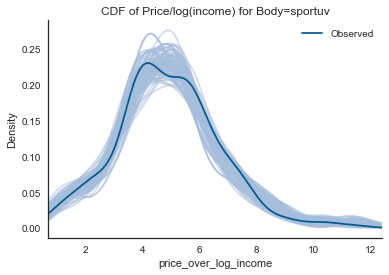

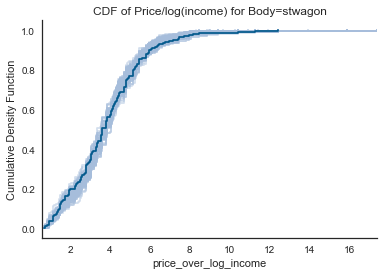

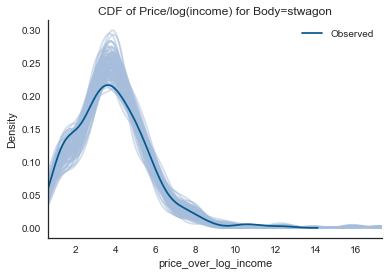

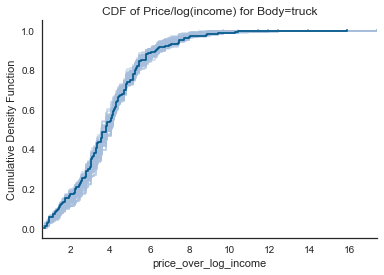

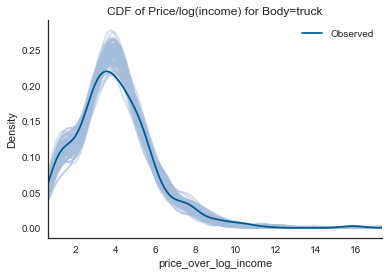

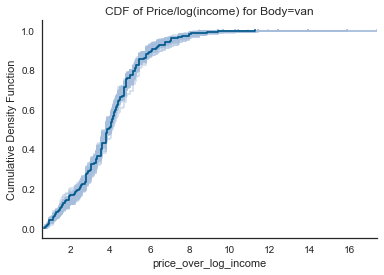

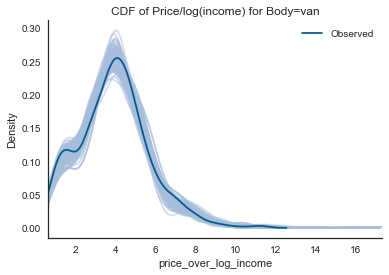

In [25]:
# Check the price variable for all of the various modes.
for body in np.sort(car_df.body_type.unique()):
    filter_row = car_df.body_type == body
    
    current_title = 'CDF of Price/log(income) for Body={}'
    
    viz.plot_simulated_cdf_traces(likelihood_sim_y,
                                  car_df,
                                  filter_row,
                                  'price_over_log_income',
                                  'choice',
                                  title=current_title.format(body))
    
    title_2 = 'KDE of Price/log(income) for Body={}'
    viz.plot_simulated_kde_traces(likelihood_sim_y,
                                  car_df,
                                  filter_row,
                                  'price_over_log_income',
                                  'choice',
                                  title=current_title.format(body))
    

There still exist problems with the price variable. Next I will try adding the natural log of price over log(income).

In [27]:
interaction_mnl_spec_2, interaction_mnl_names_2 = OrderedDict(), OrderedDict()

new_cols_and_display_names =\
    [('price_over_log_income', 'Price over log(income)'),
     ('ln(price_over_log_income)', 'ln(Price over log(income))'),
     ('range_over_100', 'Range (units: 100mi)'),
     ('acceleration_over_10', 'Acceleration (units: 0.1sec)'),
     ('top_speed_over_100', 'Top speed (units: 0.01mph)'),
     ('pollution', 'Pollution'),
     ('vehicle_size_over_10', 'Size'),
     ('big_enough', 'Big enough'),
     ('luggage_space', 'Luggage space'),
     ('tens_of_cents_per_mile', 'Operation cost'),
     ('station_availability', 'Station availability'),
     ('sports_utility_vehicle', 'Sports utility vehicle'),
     ('sports_car', 'Sports car'),
     ('station_wagon', 'Station wagon'),
     ('truck', 'Truck'),
     ('van', 'Van'),
     ('electric', 'EV'),
     ('electric_commute_lte_5mi', 'Commute < 5 & EV'),
     ('electric_and_college', 'College & EV'),
     ('compressed_natural_gas', 'CNG'),
     ('methanol', 'Methanol'),
     ('methanol_and_college', 'College & Methanol')]
    
for col, display_name in new_cols_and_display_names:
    if col in body_interactions:
        for interaction_col in body_interactions[col]:
            suffix = interaction_col[interaction_col.rfind("for_") + 4:]
            new_display_name = display_name + " ({})".format(suffix)
            
            interaction_mnl_spec_2[interaction_col] = 'all_same'
            interaction_mnl_names_2[interaction_col] = new_display_name
            
#         for interaction_col in fuel_interactions[col]:
#             suffix = interaction_col[interaction_col.rfind("for_") + 4:]
#             new_display_name = display_name + "({})".format(suffix)
            
#             interaction_mnl_spec[interaction_col] = 'all_same'
#             interaction_mnl_names[interaction_col] = new_display_name

    interaction_mnl_spec_2[col] = 'all_same'
    interaction_mnl_names_2[col] = display_name


In [29]:
# Initialize the mnl model
interaction_mnl_2 = pl.create_choice_model(data=car_df,
                                         alt_id_col='alt_id',
                                         obs_id_col='obs_id',
                                         choice_col='choice',
                                         specification=interaction_mnl_spec_2,
                                         model_type='MNL',
                                         names=interaction_mnl_names_2)

# Create the initial variables for model estimation
num_vars_2 = len(interaction_mnl_names_2)
initial_vals_2 = np.zeros(num_vars_2)

# Estimate the mnl model
fit_vals_2 = interaction_mnl_2.fit_mle(initial_vals_2,
                                       method='L-BFGS-B',
                                       just_point=True)['x']
interaction_mnl_2.fit_mle(initial_vals_2, method='BFGS')

# Look at the estimation results
interaction_mnl_2.get_statsmodels_summary()

Log-likelihood at zero: -8,338.8486
Initial Log-likelihood: -8,338.8486
Estimation Time for Point Estimation: 0.51 seconds.
Final log-likelihood: -7,338.2978


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Multinomial Logit Model Regression Results                    
===================================================================================
Dep. Variable:                      choice   No. Observations:                4,654
Model:             Multinomial Logit Model   Df Residuals:                    4,597
Method:                                MLE   Df Model:                           57
Date:                     Mon, 15 Jan 2018   Pseudo R-squ.:                   0.120
Time:                             13:59:51   Pseudo R-bar-squ.:               0.113
AIC:                            14,790.596   Log-Likelihood:             -7,338.298
BIC:                            15,157.988   LL-Null:                    -8,338.849
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------------------------
Price over log(income) (sports_utility_vehicle)           0.2593      0.063      4.096      0.000         0.135     0.383
Price over log(income) (sports_car)                       0.1590      0.065      2.441      0.015         0.031     0.287
Price over log(income) (station_wagon)                   -0.1013      0.035     -2.856      0.004        -0.171    -0.032
Price over log(income) (truck)                           -0.0570      0.027     -2.139      0.032        -0.109    -0.005
Price over log(income) (van)                             -0.0825      0.027     -3.071      0.002        -0.135    -0.030
Price over log(income)                                   -0.1026      0.060     -1.707      0.088        -0.220     0.015
ln(Price over log(income))                               -0.3786      0.235     -1.612      0.107        -0.839     0.082
Range (units: 100mi) (sports_utility_vehicle)            -0.0937      0.100     -0.937      0.349        -0.290     0.102
Range (units: 100mi) (sports_car)                        -0.0790      0.117     -0.676      0.499        -0.308     0.150
Range (units: 100mi) (station_wagon)                     -0.0885      0.085     -1.037      0.300        -0.256     0.079
Range (units: 100mi) (truck)                              0.0050      0.070      0.071      0.943        -0.132     0.142
Range (units: 100mi) (van)                                0.0640      0.067      0.960      0.337        -0.067     0.195
Range (units: 100mi)                                      0.3550      0.033     10.845      0.000         0.291     0.419
Acceleration (units: 0.1sec) (sports_utility_vehicle)    -0.1820      0.497     -0.366      0.714        -1.156     0.792
Acceleration (units: 0.1sec) (sports_car)                -0.9933      0.599     -1.657      0.097        -2.168     0.181
Acceleration (units: 0.1sec) (station_wagon)             -0.3337      0.445     -0.750      0.454        -1.206     0.539
Acceleration (units: 0.1sec) (truck)                     -0.1337      0.360     -0.371      0.711        -0.840     0.573
Acceleration (units: 0.1sec) (van)                       -0.6301      0.322     -1.959      0.050        -1.261     0.000
Acceleration (units: 0.1sec)                             -0.5414      0.145     -3.731      0.000        -0.826    -0.257
Top speed (units: 0.01mph) (sports_utility_vehicle)      -0.1065      0.329     -0.324      0.746        -0.751     0.538
Top speed (units: 0.01mph) (sports_car)                   0.2740      0.393      0.697      0.486        -0.496     1.044
Top speed (units: 0.01mph) (station_wagon)                0.1567      0.279      0.563      0.574        -0.389     0.703
Top speed (units: 0.01mph) (truck)                        0.1169      0.223      0.525      0.600        -0.320     0.553
Top speed (units: 0.01mp

# Check the interaction model

In [30]:
# Simulate values from the sampling distribution of coefficients
interaction_sampling_dist_2 =\
    scipy.stats.multivariate_normal(mean=interaction_mnl_2.params.values,
                                    cov=interaction_mnl_2.cov)
# Take Draws from the sampling distribution
num_draws = 500
simulated_coefs_2 = interaction_sampling_dist_2.rvs(num_draws)
simulated_coefs_2.shape

# Predict the model probabilities
simulated_probs_2 =\
    interaction_mnl_2.predict(car_df,
                    param_list=[simulated_coefs_2.T, None, None, None])

# Simulate y from the sampling distribution
likelihood_sim_y_2 =\
    viz.simulate_choice_vector(simulated_probs_2,
                               car_df['obs_id'].values,
                               rseed=1122018)

Simulating Choices: 100%|██████████| 4654/4654 [00:00<00:00, 8773.45it/s]


Calculating KDEs: 100%|██████████| 100/100 [00:00<00:00, 196.42it/s]


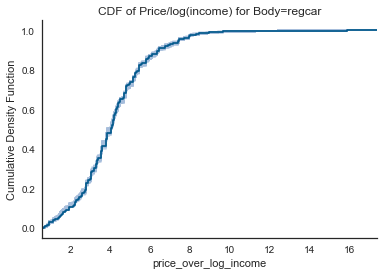

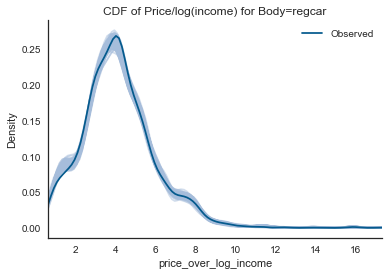

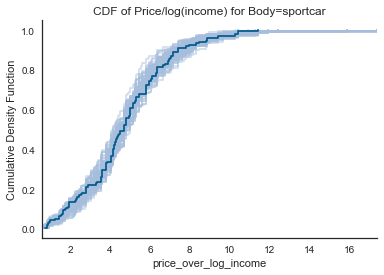

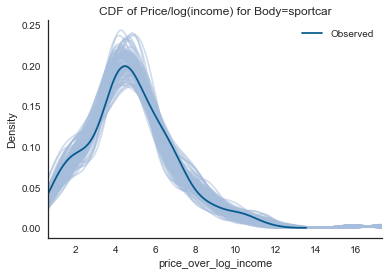

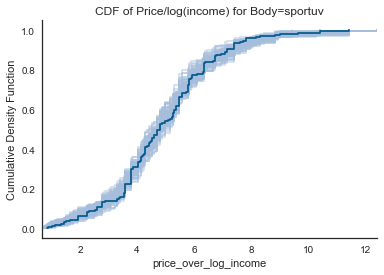

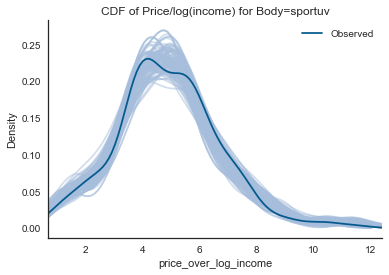

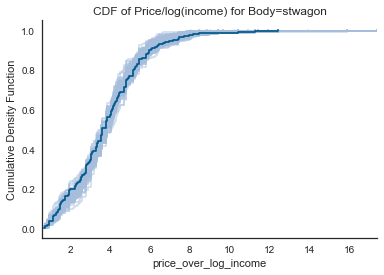

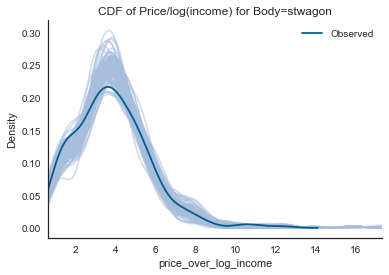

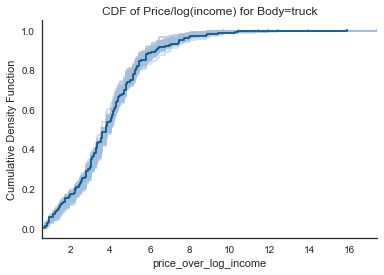

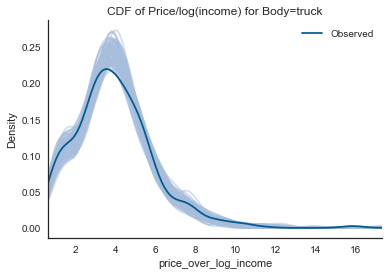

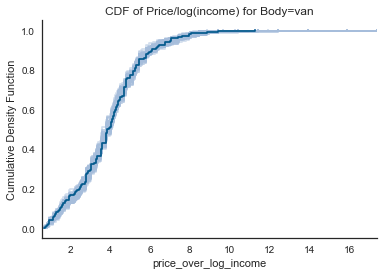

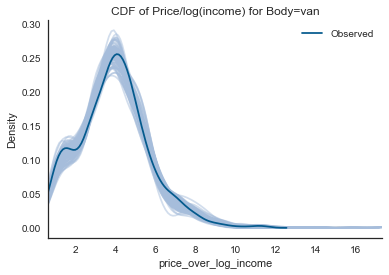

In [31]:
# Check the price variable for all of the various modes.
for body in np.sort(car_df.body_type.unique()):
    filter_row = car_df.body_type == body
    
    current_title = 'CDF of Price/log(income) for Body={}'
    
    viz.plot_simulated_cdf_traces(likelihood_sim_y_2,
                                  car_df,
                                  filter_row,
                                  'price_over_log_income',
                                  'choice',
                                  title=current_title.format(body))
    
    title_2 = 'KDE of Price/log(income) for Body={}'
    viz.plot_simulated_kde_traces(likelihood_sim_y_2,
                                  car_df,
                                  filter_row,
                                  'price_over_log_income',
                                  'choice',
                                  title=current_title.format(body))
    